In [9]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),'../scripts')))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries

In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\hp\Documents\Tnx-projects\Tnx-academy-week-2\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [17]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
# Check for missing values in handset-related columns
missing_handset_manufacturer = df['Handset Manufacturer'].isnull().sum()
missing_handset_type = df['Handset Type'].isnull().sum()

print(f"Missing values in 'Handset Manufacturer': {missing_handset_manufacturer}")
print(f"Missing values in 'Handset Type': {missing_handset_type}")


Missing values in 'Handset Manufacturer': 572
Missing values in 'Handset Type': 572


In [19]:
# Replace missing values with a placeholder
df['Handset Manufacturer'].fillna('Unknown Manufacturer', inplace=True)
df['Handset Type'].fillna('Unknown Handset', inplace=True)
print("Missing handset values have been replaced with 'Unknown'.")


Missing handset values have been replaced with 'Unknown'.


C:\Users\hp\AppData\Local\Temp\ipykernel_24076\3927142570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Handset Manufacturer'].fillna('Unknown Manufacturer', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_24076\3927142570.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [20]:
# Check again for missing values
print("Remaining missing values:")
print(df[['Handset Manufacturer', 'Handset Type']].isnull().sum())

# Display the first few rows of the cleaned dataset
print(df[['Handset Manufacturer', 'Handset Type']].head())


Remaining missing values:
Handset Manufacturer    0
Handset Type            0
dtype: int64
  Handset Manufacturer                 Handset Type
0              Samsung   Samsung Galaxy A5 Sm-A520F
1              Samsung  Samsung Galaxy J5 (Sm-J530)
2              Samsung     Samsung Galaxy A8 (2018)
3            undefined                    undefined
4              Samsung             Samsung Sm-G390F


In [21]:
# Top 5 manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(5)
print("Top 5 Handset Manufacturers:")
print(top_manufacturers)

# Top 10 handsets
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handset Types:")
print(top_handsets)


Top 5 Handset Manufacturers:
Handset Manufacturer
Apple                            59565
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: count, dtype: int64
Top 10 Handset Types:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


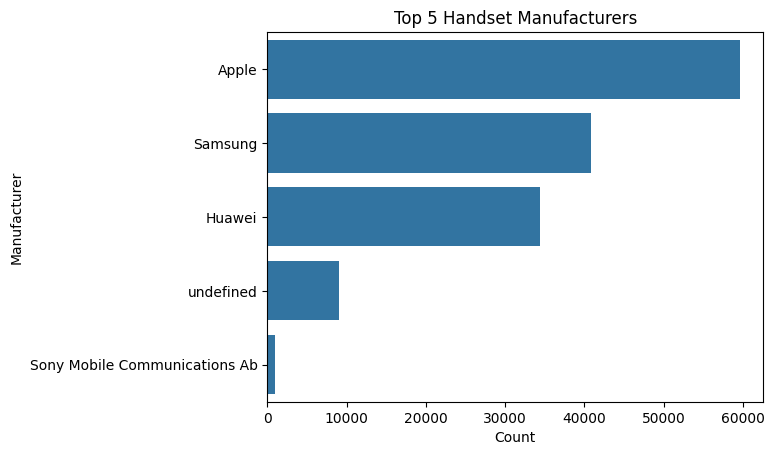

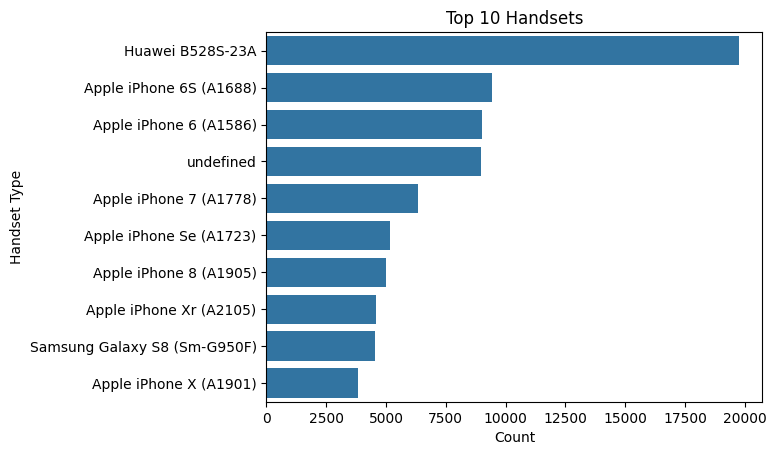

In [22]:
# Visualize Top 5 Manufacturers
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index)
plt.title('Top 5 Handset Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

# Visualize Top 10 Handsets
sns.barplot(x=top_handsets.values, y=top_handsets.index)
plt.title('Top 10 Handsets')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()


In [25]:
# Use the correct column name for grouping
user_behavior = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
}).reset_index()
# Calculate total data volume for each application and for all sessions
user_behavior['Total Data Volume'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    user_behavior[f'{app} Total Data'] = user_behavior[f'{app} DL (Bytes)'] + user_behavior[f'{app} UL (Bytes)']

print(user_behavior.head())


   MSISDN/Number  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0   3.360100e+10   116720.0      8.426375e+08        36053108.0   
1   3.360100e+10   181230.0      1.207552e+08        36104459.0   
2   3.360100e+10   134969.0      5.566597e+08        39306820.0   
3   3.360101e+10    49878.0      4.019932e+08        20327526.0   
4   3.360101e+10    37104.0      1.363130e+09        94280527.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2206504.0                  25631.0          3337123.0   
1                2598548.0                  62017.0          4197697.0   
2                3148004.0                  47619.0          3343483.0   
3                 251469.0                  28825.0          5937765.0   
4                2861230.0                  51312.0         13728668.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  ...  \
0          1051882.0          837400.0          493962.0  ...   
1          1137166.0  

In [26]:
# Check data types and basic statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [28]:
# Segment users based on total session duration
user_behavior['Decile'] = pd.qcut(user_behavior['Dur. (ms)'], 10, labels=False)

# Compute total data per decile
decile_summary = user_behavior.groupby('Decile').agg({
    'Dur. (ms)': 'sum',
    'Total Data Volume': 'sum',
}).reset_index()

print("Decile Summary:\n", decile_summary)


Decile Summary:
    Decile     Dur. (ms)  Total Data Volume
0       0  2.145383e+08       5.439277e+12
1       1  4.298068e+08       6.109410e+12
2       2  7.643883e+08       6.536402e+12
3       3  1.043508e+09       6.034241e+12
4       4  8.701137e+08       5.143732e+12
5       5  1.254869e+09       6.426251e+12
6       6  1.579210e+09       6.152478e+12
7       7  1.869399e+09       7.822234e+12
8       8  2.486470e+09       9.305495e+12
9       9  5.106534e+09       1.486393e+13


In [29]:
# Basic metrics for quantitative variables
metrics = user_behavior[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data Volume']].describe()
print("Basic Metrics:\n", metrics)


Basic Metrics:
           Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  Total Data Volume
count  1.068560e+05      1.068560e+05      1.068560e+05       1.068560e+05
mean   1.461672e+05      6.336527e+08      5.730942e+07       6.909621e+08
std    1.863587e+05      4.645551e+08      3.565765e+07       4.910559e+08
min    7.142000e+03      8.827082e+06      2.866892e+06       3.324901e+07
25%    7.130800e+04      3.148271e+08      3.639547e+07       3.585499e+08
50%    1.027400e+05      5.703677e+08      4.679387e+07       6.179231e+08
75%    1.727990e+05      8.073645e+08      6.573199e+07       8.574351e+08
max    1.855375e+07      8.156743e+09      7.295774e+08       8.846226e+09


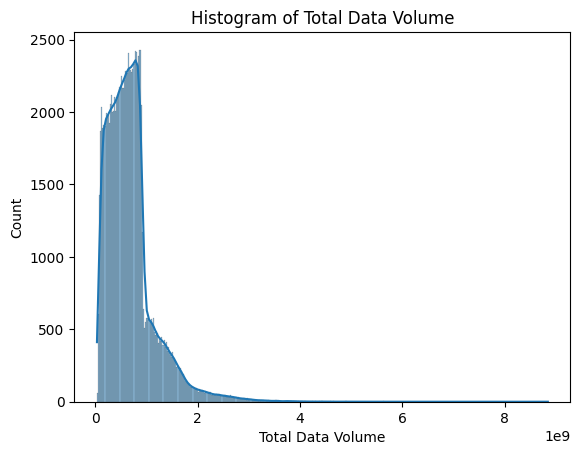

In [31]:
# Histogram for total data volume
sns.histplot(user_behavior['Total Data Volume'], kde=True)
plt.title("Histogram of Total Data Volume")
plt.show()



Correlation Matrix:
                          Social Media Total Data  Google Total Data  \
Social Media Total Data                 1.000000           0.643071   
Google Total Data                       0.643071           1.000000   
Email Total Data                        0.634016           0.688460   
Youtube Total Data                      0.659545           0.718539   
Netflix Total Data                      0.659974           0.716191   
Gaming Total Data                       0.590048           0.642037   
Other Total Data                        0.591727           0.642608   

                         Email Total Data  Youtube Total Data  \
Social Media Total Data          0.634016            0.659545   
Google Total Data                0.688460            0.718539   
Email Total Data                 1.000000            0.704632   
Youtube Total Data               0.704632            1.000000   
Netflix Total Data               0.705466            0.738445   
Gaming Total Data   

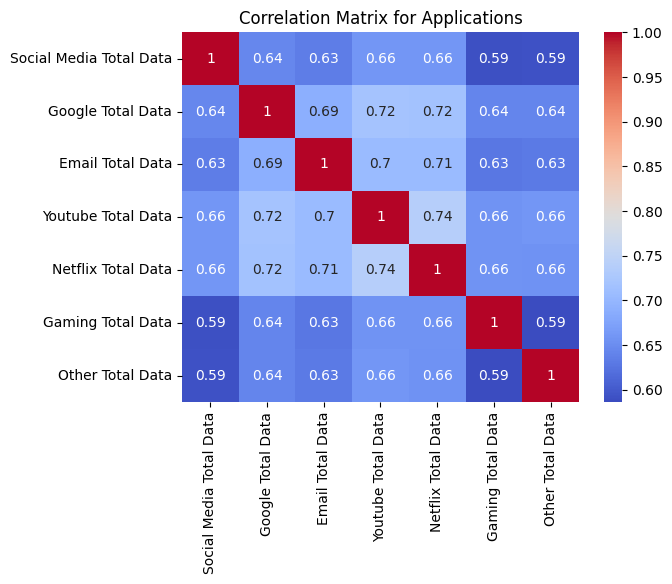

In [32]:
# Correlation matrix for application data
apps_data = user_behavior[[f'{app} Total Data' for app in applications]]
correlation_matrix = apps_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Applications")
plt.show()


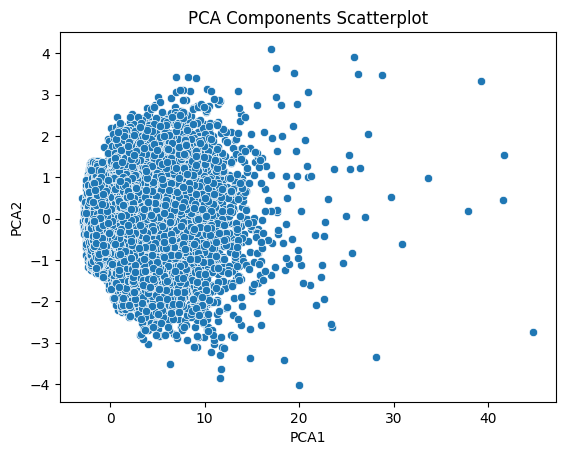

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize application-related data
scaler = StandardScaler()
apps_scaled = scaler.fit_transform(apps_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(apps_scaled)

# Add PCA results to the dataset
user_behavior['PCA1'] = pca_result[:, 0]
user_behavior['PCA2'] = pca_result[:, 1]

# Scatterplot of PCA components
sns.scatterplot(x=user_behavior['PCA1'], y=user_behavior['PCA2'])
plt.title("PCA Components Scatterplot")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()
